 **INTRODUCTION**

*   Welcome to the Indica Café Data Analysis Project. This notebook aims to analyze customer data and menu performance from the Indica Café. The café recently introduced a new menu, and as the data analyst, your goal is to identify trends and insights regarding the performance of various dishes and customer preferences.

**OBJECTIVES**
1. Explore the Items Table: Analyze the menu items to understand the distribution of dishes across categories, pricing, and identify the most and least expensive items.
2. Explore the Orders Table: Investigate customer order data, including order frequency, date range, and order sizes.
3. Analyze Customer Behavior: Combine menu and order data to assess customer preferences, identify top-spending orders, and explore the impact of the new menu.

**Tools and Libraries**

This analysis will be conducted using the SQL queries along with the following Python libraries:
* **Pandas**: For data manipulation and analysis.
* **Seaborn** and **Matplotlib**: For visualizations, including bar plots and histograms.
* **Plotly Express**: For interactive and advanced visualizations.
* **SQLite**: As the database engine to store and query the data.





**Install necessary libraries if you haven't already:**

In [1]:
%pip install pandas matplotlib seaborn sqlalchemy pymysql plotly

Note: you may need to restart the kernel to use updated packages.


**Import the required libraries in your notebook:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import plotly.express as px
import warnings

**Download the database creation file using this [link](https://drive.google.com/file/d/1XmwIgSD0h_5P_9VecKkV6AQxPc5_BTrJ/view?usp=sharing) and make sure to upload it in the working directory of this notebook.**

*   If you're working on colab then upload directly in the files as shown below:

* 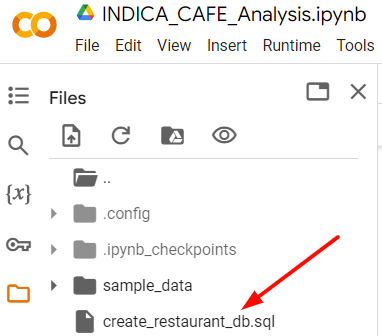



**Set up a connection for SQL database (online):**

In [3]:
!cd

e:\Documents\01. SQL\2.maven_restaurant_analysis


In [4]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd

# Path to your uploaded SQL file
sql_file_path = 'create_restaurant_dbsqlite.sql'

# Create an in-memory SQLite database
engine = create_engine('sqlite:///:memory:')

# Function to execute SQL script
def execute_sql_script(engine, script_path):
    # Connect to the in-memory SQLite database
    conn = engine.raw_connection()
    cursor = conn.cursor()
    try:
        # Read and execute the SQL script
        with open(script_path, 'r') as file:
            sql_script = file.read()
        cursor.executescript(sql_script)
        conn.commit()
        print("SQL script executed successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        cursor.close()
        conn.close()

# Execute the SQL script
execute_sql_script(engine, sql_file_path)

# Verify the tables in the database
tables_df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", engine)
print("Tables in database:")
print(tables_df)

# Example query to get data from a table
try:
    df = pd.read_sql("SELECT * FROM menu_items;", engine)
    print("Data from menu_items table:")
    print(df.head(10))
except Exception as e:
    print(f"An error occurred while querying the table: {e}")


SQL script executed successfully.
Tables in database:
            name
0  order_details
1     menu_items
Data from menu_items table:
   menu_item_id         item_name  category  price
0           101         Hamburger  American  12.95
1           102      Cheeseburger  American  13.95
2           103           Hot Dog  American   9.00
3           104     Veggie Burger  American  10.50
4           105      Mac & Cheese  American   7.00
5           106      French Fries  American   7.00
6           107    Orange Chicken     Asian  16.50
7           108     Tofu Pad Thai     Asian  14.50
8           109  Korean Beef Bowl     Asian  17.95
9           110        Pork Ramen     Asian  17.95


**You can now run the SQL queries.**

## **Objective 1**



**1. View the Menu Items Table:**

In [5]:
query = "SELECT * FROM menu_items;"
menu_items_df = pd.read_sql(query, engine)
display(menu_items_df)

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00
5,106,French Fries,American,7.00
6,107,Orange Chicken,Asian,16.50
7,108,Tofu Pad Thai,Asian,14.50
8,109,Korean Beef Bowl,Asian,17.95
9,110,Pork Ramen,Asian,17.95


**2. Total Number of Menu Items:**

In [6]:
query = "SELECT COUNT(*) AS total_items FROM menu_items;"
total_items_df = pd.read_sql(query, engine)
display(total_items_df)

,total_items
0,32


**3. Most and Least Expensive Dishes:**



In [7]:
query = "SELECT * FROM menu_items ORDER BY price LIMIT 1;"
cheapest_dish_df = pd.read_sql(query, engine)
print('Least expensive dish:')
display(cheapest_dish_df) # least expensive dish

query = "SELECT * FROM menu_items ORDER BY price DESC LIMIT 1;"
expensive_dish_df = pd.read_sql(query, engine)
print('Most expensive dish')
display(expensive_dish_df) # most expensive dish

Least expensive dish:


,menu_item_id,item_name,category,price
0,113,Edamame,Asian,5.0


Most expensive dish


,menu_item_id,item_name,category,price
0,130,Shrimp Scampi,Italian,19.95


**4. Total Number of Italian Dishes:**

In [8]:
query = "SELECT COUNT(*) AS total_italian FROM menu_items WHERE category='Italian';"
total_italian_df = pd.read_sql(query, engine)
display(total_italian_df)

,total_italian
0,9


**5. Cheapest and Most Expensive Italian Dishes:**



In [9]:
query = "SELECT * FROM menu_items WHERE category='Italian' ORDER BY price LIMIT 1;"
cheapest_italian_df = pd.read_sql(query, engine)
print('Cheapest Italian Dish:')
display(cheapest_italian_df)

query = "SELECT * FROM menu_items WHERE category='Italian' ORDER BY price DESC LIMIT 1;"
expensive_italian_df = pd.read_sql(query, engine)
print('Most Expensive Italian Dish:')
display(expensive_italian_df)


Cheapest Italian Dish:


,menu_item_id,item_name,category,price
0,124,Spaghetti,Italian,14.5


Most Expensive Italian Dish:


,menu_item_id,item_name,category,price
0,130,Shrimp Scampi,Italian,19.95


**6. Number of Dishes per Category:**


In [10]:
query = "SELECT category, COUNT(menu_item_id) AS total_dishes FROM menu_items GROUP BY category;"
dishes_per_category_df = pd.read_sql(query, engine)
display(dishes_per_category_df)

,category,total_dishes
0,American,6
1,Asian,8
2,Italian,9
3,Mexican,9


**7. Average Price of Dishes per Category:**



In [11]:
query = "SELECT category, AVG(price) AS avg_price FROM menu_items GROUP BY category;"
avg_price_per_category_df = pd.read_sql(query, engine)
display(avg_price_per_category_df)

,category,avg_price
0,American,10.066667
1,Asian,13.475000
2,Italian,16.750000
3,Mexican,11.800000


**Let's visualize some of these results using python libraries.**

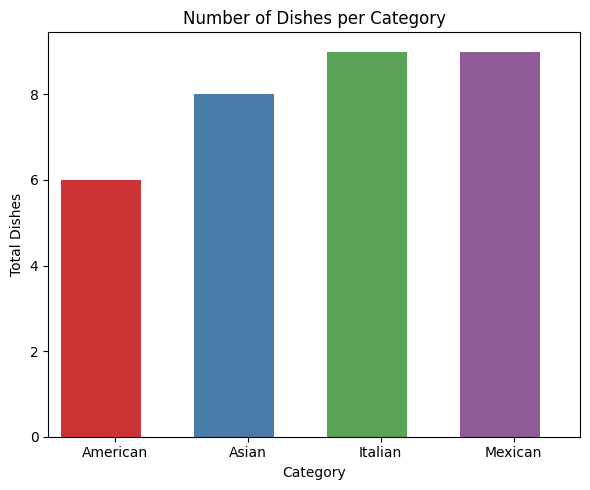

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #  Suppressing Warnings
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='category', y='total_dishes', data=dishes_per_category_df, palette='Set1')
for bar in ax.patches:
    bar.set_width(0.6)
plt.title('Number of Dishes per Category')
plt.xlabel('Category')
plt.ylabel('Total Dishes')
plt.xticks()
plt.tight_layout()
plt.show()

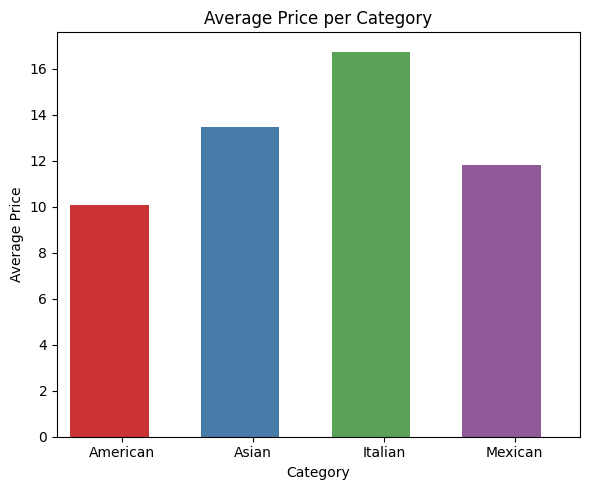

In [13]:
warnings.simplefilter(action='ignore', category=FutureWarning) #  Suppressing Warnings
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='category', y='avg_price', data=avg_price_per_category_df, palette='Set1')
for bar in ax.patches:
    bar.set_width(0.6)
plt.title('Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks()
plt.tight_layout()
plt.show()

## **Objective 2**  

**1. View the order_details table:**

In [14]:
query_1 = "SELECT * FROM order_details;"
order_details_df = pd.read_sql_query(query_1, engine)
order_details_df.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,2023-01-01,11:38:36,109.0
1,2,2,2023-01-01,11:57:40,108.0
2,3,2,2023-01-01,11:57:40,124.0
3,4,2,2023-01-01,11:57:40,117.0
4,5,2,2023-01-01,11:57:40,129.0


**2. Date Range of Orders:**

In [15]:
query_2 = "SELECT MIN(order_date) AS first_date, MAX(order_date) AS last_date FROM order_details;"
date_range_df = pd.read_sql_query(query_2, engine)
date_range_df

,first_date,last_date
0,2023-01-01,2023-03-31


**3. Total Number of Orders:**

In [16]:
query_3 = "SELECT COUNT(DISTINCT(order_id)) AS total_orders FROM order_details;"
total_orders_df = pd.read_sql_query(query_3, engine)
total_orders_df

,total_orders
0,5370


**4. Total Number of Dishes Ordered:**

In [17]:
query_4 = "SELECT COUNT(*) AS total_dishes FROM order_details;"
total_dishes_df = pd.read_sql_query(query_4, engine)
total_dishes_df

,total_dishes
0,12234


**5. Order ID with the Most Number of Dishes:**

In [18]:
query_5 = """
SELECT order_id, COUNT(item_id) AS total_items
FROM order_details
GROUP BY order_id
ORDER BY COUNT(item_id) DESC
LIMIT 1;
"""
most_dishes_order_df = pd.read_sql_query(query_5, engine)
most_dishes_order_df

,order_id,total_items
0,4305,14


**6. Order ID(s) with 13 or More Dishes:**



In [19]:
query_6 = """
SELECT order_id, COUNT(item_id) AS total_items
FROM order_details
GROUP BY order_id
HAVING total_items >= 13;
"""
large_orders_df = pd.read_sql_query(query_6, engine)
large_orders_df

,order_id,total_items
0,330,14
1,440,14
2,443,14
3,1274,13
4,1569,13
5,1685,13
6,1734,13
7,1957,14
8,2075,13
9,2126,13


**Let's visualize some of these results using python libraries.**



*   Plot the trend of orders from the first day to the current date.
*   Display the approx. number of orders placed each day.




In [20]:
# Query to get the date range of orders
query_date_range = "SELECT MIN(order_date) AS min_date, MAX(order_date) AS max_date FROM order_details;"
date_range_df = pd.read_sql_query(query_date_range, engine)
query_orders_per_day = """
SELECT order_date, COUNT(DISTINCT order_id) AS number_of_orders
FROM order_details
GROUP BY order_date
ORDER BY order_date;
"""
orders_per_day_df = pd.read_sql_query(query_orders_per_day, engine)
fig_timeline = px.line(orders_per_day_df, x='order_date', y='number_of_orders',
                       title='Trend of Orders Over Time',
                       labels={'order_date': 'Date', 'number_of_orders': 'Number of Orders'},
                       markers=True)
fig_timeline.show()

min_date = date_range_df['min_date'][0]
max_date = date_range_df['max_date'][0]
date_range = pd.to_datetime(max_date) - pd.to_datetime(min_date)
num_days = date_range.days + 1
query_total_orders = "SELECT COUNT(DISTINCT order_id) AS total_orders FROM order_details;"
total_orders_df = pd.read_sql_query(query_total_orders, engine)
total_orders = total_orders_df['total_orders'][0]

# Calculate average orders per day
average_orders_per_day = total_orders / num_days
print(f"Average Orders per Day: {average_orders_per_day:.2f}")

Average Orders per Day: 59.67


##**Objective 3**

**1. Combine menu items and order_details:**

In [21]:
query_combined = """
SELECT * FROM order_details od
LEFT JOIN menu_items mi
ON od.item_id = mi.menu_item_id;
"""
combined_df = pd.read_sql(query_combined, engine)
display(combined_df)

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price
0,1,1,2023-01-01,11:38:36,109.0,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,2023-01-01,11:57:40,108.0,108.0,Tofu Pad Thai,Asian,14.50
2,3,2,2023-01-01,11:57:40,124.0,124.0,Spaghetti,Italian,14.50
3,4,2,2023-01-01,11:57:40,117.0,117.0,Chicken Burrito,Mexican,12.95
4,5,2,2023-01-01,11:57:40,129.0,129.0,Mushroom Ravioli,Italian,15.50
...,...,...,...,...,...,...,...,...,...
12229,12230,5369,2023-03-31,22:05:04,109.0,109.0,Korean Beef Bowl,Asian,17.95
12230,12231,5369,2023-03-31,22:05:04,129.0,129.0,Mushroom Ravioli,Italian,15.50
12231,12232,5369,2023-03-31,22:05:04,120.0,120.0,Steak Torta,Mexican,13.95
12232,12233,5369,2023-03-31,22:05:04,122.0,122.0,Chips & Salsa,Mexican,7.00


**2. Least and most ordered items:**

In [22]:
query_least_ordered = """
SELECT item_name, category, COUNT(order_details_id) AS total_purchase
FROM order_details od
LEFT JOIN menu_items mi
ON od.item_id = mi.menu_item_id
GROUP BY item_name, category
ORDER BY total_purchase ASC;
"""
print('Top-5 least ordered dishes')
least_ordered_df = pd.read_sql(query_least_ordered, engine)
display(least_ordered_df.head())

query_most_ordered = """
SELECT item_name, category, COUNT(order_details_id) AS total_purchase
FROM order_details od
LEFT JOIN menu_items mi
ON od.item_id = mi.menu_item_id
GROUP BY item_name, category
ORDER BY total_purchase DESC;
"""
print('\n\nTop-5 most ordered dishes')
most_ordered_df = pd.read_sql(query_most_ordered, engine)
display(most_ordered_df.head())

Top-5 least ordered dishes


,item_name,category,total_purchase
0,Chicken Tacos,Mexican,123
1,None,None,137
2,Potstickers,Asian,205
3,Cheese Lasagna,Italian,207
4,Steak Tacos,Mexican,214




Top-5 most ordered dishes


,item_name,category,total_purchase
0,Hamburger,American,622
1,Edamame,Asian,620
2,Korean Beef Bowl,Asian,588
3,Cheeseburger,American,583
4,French Fries,American,571


**3. Top 10 orders that spent the most money**

In [23]:
query_top_orders = """
SELECT order_id, SUM(price) AS total_order_price
FROM order_details od
LEFT JOIN menu_items mi
ON od.item_id = mi.menu_item_id
GROUP BY order_id
ORDER BY total_order_price DESC LIMIT 10;
"""
top_orders_df = pd.read_sql(query_top_orders, engine)
display(top_orders_df)

,order_id,total_order_price
0,440,192.15
1,2075,191.05
2,1957,190.10
3,330,189.70
4,2675,185.10
5,4482,184.50
6,1274,183.55
7,2188,182.65
8,3473,182.55
9,3583,179.60


**4. Details of the highest spend order:**

In [24]:
query_highest_spend_order = """
SELECT category, COUNT(item_id) AS num_items
FROM order_details od
LEFT JOIN menu_items mi
ON od.item_id = mi.menu_item_id
WHERE order_id = 440
GROUP BY category;
"""
highest_spend_order_df = pd.read_sql(query_highest_spend_order, engine)
display(highest_spend_order_df)

,category,num_items
0,American,2
1,Asian,2
2,Italian,8
3,Mexican,2


**5. Details of the top 5 highest spend orders:**

In [25]:
query_top_5_orders = """
SELECT order_id, category, COUNT(item_id) AS num_items
FROM order_details od
LEFT JOIN menu_items mi
ON od.item_id = mi.menu_item_id
WHERE order_id IN (440, 2075, 1957, 330, 2675)
GROUP BY order_id, category;
"""
top_5_orders_df = pd.read_sql(query_top_5_orders, engine)
display(top_5_orders_df)

,order_id,category,num_items
0,330,American,1
1,330,Asian,6
2,330,Italian,3
3,330,Mexican,4
4,440,American,2
5,440,Asian,2
6,440,Italian,8
7,440,Mexican,2
8,1957,American,3
9,1957,Asian,3


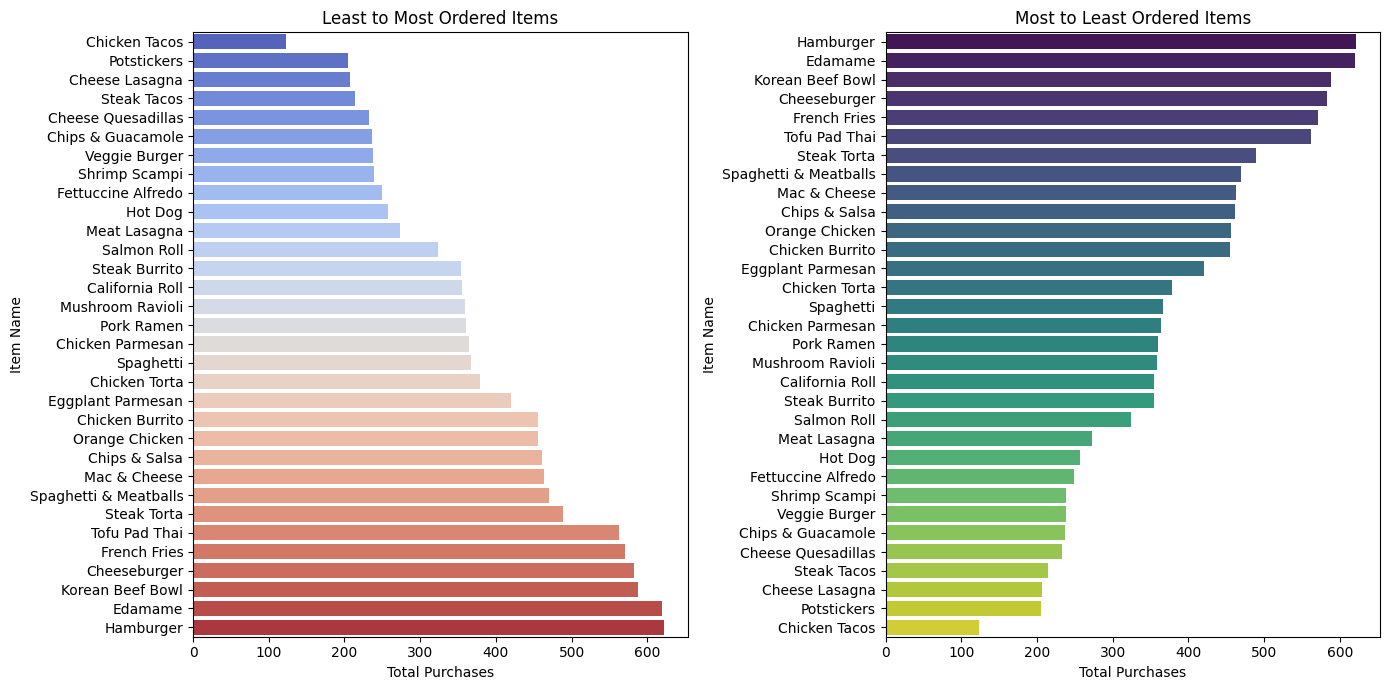

In [26]:
# Visualization for least and most ordered items
plt.figure(figsize=(14, 7))

# Least Ordered Items
plt.subplot(1, 2, 1)
sns.barplot(x='total_purchase', y='item_name', data=least_ordered_df, palette='coolwarm')
plt.title('Least to Most Ordered Items')
plt.xlabel('Total Purchases')
plt.ylabel('Item Name')

# Most Ordered Items
plt.subplot(1, 2, 2)
sns.barplot(x='total_purchase', y='item_name', data=most_ordered_df, palette='viridis')
plt.title('Most to Least Ordered Items')
plt.xlabel('Total Purchases')
plt.ylabel('Item Name')

plt.tight_layout()
plt.show()






In [27]:
import plotly.express as px

# Visualization for top 10 orders that spent the most money
fig_top_orders = px.bar(top_orders_df, x='order_id', y='total_order_price',
                       title='Top 10 Orders by Total Sale',
                       labels={'order_id': 'Order ID', 'total_order_price': 'Total Order Price'},
                       color='total_order_price', color_continuous_scale='Viridis')

# Customize x-axis tick labels to show only for the top orders
fig_top_orders.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=top_orders_df['order_id'],
        ticktext=[str(order_id) for order_id in top_orders_df['order_id']]
    )
)

fig_top_orders.show()


In [28]:
# Visualization for the highest spend order
fig_highest_spend_order = px.bar(highest_spend_order_df, x='category', y='num_items',
                                title='Highest Spend Order (#440) - Items per Category',
                                labels={'category': 'Category', 'num_items': 'Number of Items'},
                                color='num_items', color_continuous_scale='Rainbow')

# Customize layout to adjust figure size and bar thickness
fig_highest_spend_order.update_layout(
    width=600,  # Set the width of the figure
    height=500, # Set the height of the figure
    xaxis=dict(
        tickmode='array',
        tickvals=highest_spend_order_df['category'],
        ticktext=[str(category) for category in highest_spend_order_df['category']]
    ),
    bargap=0.3  # Adjust the gap between bars; lower values mean thicker bars
)

fig_highest_spend_order.show()

In [29]:
# Visualization for the top 5 highest spend orders
fig_top_5_orders = px.bar(top_5_orders_df, x='order_id', y='num_items', color='category',
                         title='Top 5 Highest Spend Orders - Items per Category',
                         labels={'order_id': 'Order ID', 'num_items': 'Number of Items'})

# Customize layout to adjust figure size and bar thickness
fig_top_5_orders.update_layout(
    width=600,  # Set the width of the figure
    height=500, # Set the height of the figure
    xaxis=dict(
        tickmode='array',
        tickvals=top_5_orders_df['order_id'],  # Show ticks only for plotted bars
        ticktext=[str(order_id) for order_id in top_5_orders_df['order_id']]
    ),
    bargap=0.1  # Reduce the gap between bars; set to a lower value to make bars thicker
)
fig_top_5_orders.show()